**Model to predict iris Name**

In [1]:
# importing data from system

import pandas as pd
data = pd.read_csv('C:/Users/DELL/Desktop/Programming/iris.csv')

In [2]:
#the first twenty samples
data.head(20)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
# columns in the data
data.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

In [4]:
# checking the statistical nature of the data
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,149.000000,146.000000,147.000000,150.000000
mean,5.831544,3.052055,3.760544,1.198667
std,0.818130,0.437898,1.770054,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.550000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  149 non-null    float64
 1   SepalWidth   146 non-null    float64
 2   PetalLength  147 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#checking the missing values in each features
data.isna().sum()

SepalLength    1
SepalWidth     4
PetalLength    3
PetalWidth     0
Name           0
dtype: int64

In [7]:
#filling the missing values in each featutes
data['SepalLength'] = data['SepalLength'].fillna(data['SepalLength'].mean())
data['SepalWidth'] = data['SepalWidth'].fillna(data['SepalWidth'].median())
data['PetalLength'] = data['PetalLength'].fillna(data['PetalLength'].mean())

In [8]:
#Rechecking the missing values in each features
data.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [9]:
# Removing duplicate samples from the data if any
dup = data.duplicated(keep = 'first')
New_data = data[~dup]

In [10]:
# Encoding the feature with object type

sorted(New_data.Name.unique())

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [11]:
New_data['Name_Encoded'] = New_data['Name'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2])

C:\Users\DELL\AppData\Local\Temp/ipykernel_3948/1018464043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_data['Name_Encoded'] = New_data['Name'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2])


In [12]:
# the last fifteen samples
New_data.tail(15)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Name_Encoded
134,6.1,2.6,5.600000,1.4,Iris-virginica,2
135,7.7,3.0,6.100000,2.3,Iris-virginica,2
136,6.3,3.4,5.600000,2.4,Iris-virginica,2
137,6.4,3.1,5.500000,1.8,Iris-virginica,2
138,6.0,3.0,4.800000,1.8,Iris-virginica,2
139,6.9,3.1,5.400000,2.1,Iris-virginica,2
140,6.7,3.0,5.600000,2.4,Iris-virginica,2
141,6.9,3.1,5.100000,2.3,Iris-virginica,2
143,6.8,3.2,5.900000,2.3,Iris-virginica,2
144,6.7,3.3,5.700000,2.5,Iris-virginica,2


In [13]:
# dropping the initial un-encoded Name feature
del New_data['Name']

In [14]:
New_data.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name_Encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


<Figure size 1440x1440 with 0 Axes>

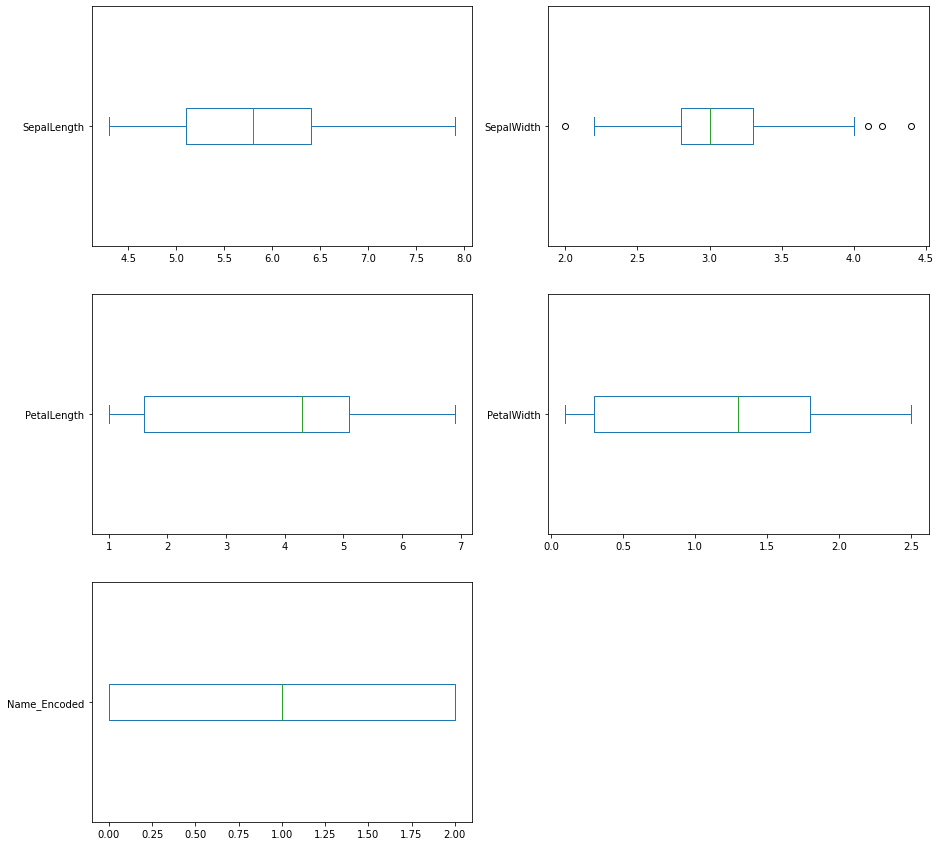

In [15]:
#visualizing the data for possible outliers

#Box plot
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
New_data.plot(kind = 'box', subplots = True , layout = (3,2) , sharex = False, vert = False)
plt.gcf().set_size_inches(15,15)
plt.show()

<Figure size 1440x1440 with 0 Axes>

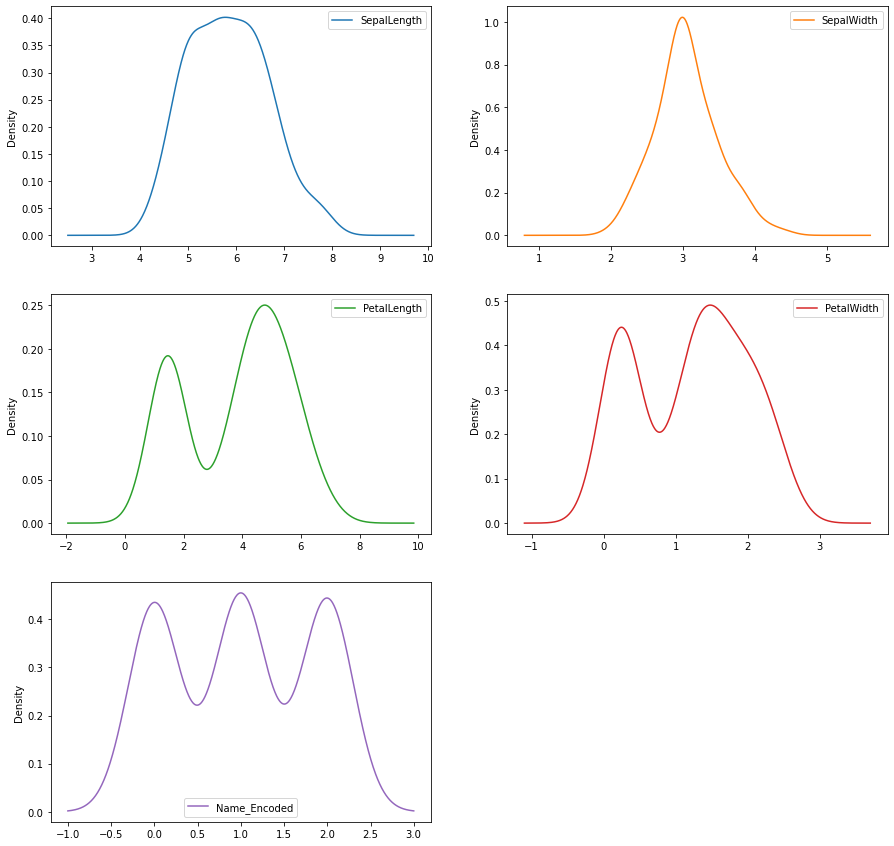

In [16]:
#density plot
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
New_data.plot(kind = 'density', subplots = True , layout = (3,2) , sharex = False)
plt.gcf().set_size_inches(15,15)
plt.show()

In [17]:
#removing outliers from SepalWidth

dt = New_data.loc[(New_data['SepalWidth'] < 4.0) & (New_data['SepalWidth'] > 2.2)].reset_index(drop=True)

<Figure size 1440x1440 with 0 Axes>

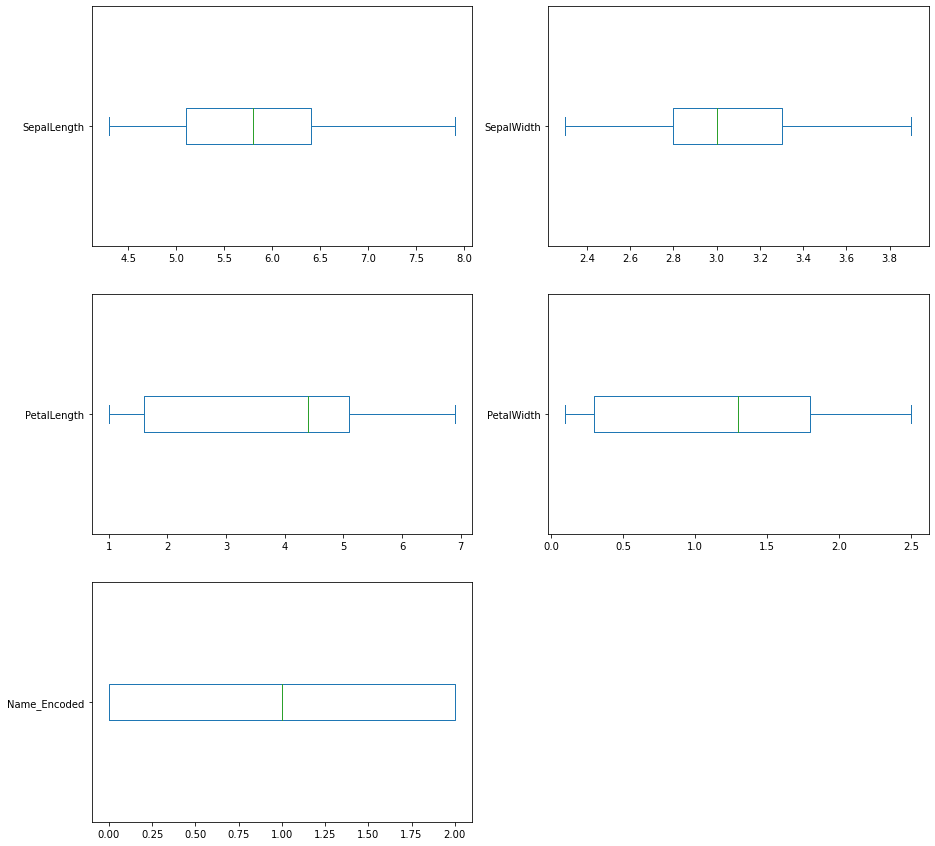

In [18]:
# Visualizing New data after removing outliers

#Box plot
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
dt.plot(kind = 'box', subplots = True , layout = (3,2) , sharex = False, vert = False)
plt.gcf().set_size_inches(15,15)
plt.show()

In [19]:
dt_columns = dt.columns
dt_columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',
       'Name_Encoded'],
      dtype='object')

In [20]:
# Transforming the data

from sklearn.preprocessing import Normalizer
dt_array = dt.values
X = dt_array[:,0:-1]
Y = dt_array[:,-1]
demo = Normalizer()
Normalized_data = demo.fit_transform(X)


In [21]:
# converting Normalized data from array to dataframe

tranformed_data = pd.DataFrame(Normalized_data, columns = dt_columns[0:-1])

In [22]:
tranformed_data['Name_'] = dt["Name_Encoded"]

In [23]:
tranformed_data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name_
0,0.803773,0.551609,0.220644,0.031521,0
1,0.828133,0.507020,0.236609,0.033801,0
2,0.805333,0.548312,0.222752,0.034269,0
3,0.800030,0.539151,0.260879,0.034784,0
4,0.790965,0.569495,0.221470,0.031639,0
...,...,...,...,...,...
134,0.721557,0.323085,0.560015,0.247699,2
135,0.729654,0.289545,0.579090,0.220054,2
136,0.780296,0.360137,0.451437,0.240091,2
137,0.674671,0.369981,0.587616,0.250281,2


In [24]:
# Make Model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

model = GaussianNB() #blank mdoel

tranformed_data_array = tranformed_data.values
X = tranformed_data_array[:,0:-1]
Y = tranformed_data_array[:,-1]

model_Name = model.fit(X,Y)

num_fold = 2

Scoring = "neg_mean_absolute_error"

kfold = KFold(n_splits = num_fold, shuffle =True, random_state = num_fold)
Result = cross_val_score(model_Name,X,Y,cv=kfold)
Negative_Mean_Absolute_Error = cross_val_score(model_Name,X,Y,cv=kfold, scoring = Scoring)
Result_Predict = cross_val_predict(model_Name,X,Y,cv=kfold)

In [25]:
Result_Predict 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 2., 2.])

In [26]:
Number_of_predictions = len(Result_Predict)
Number_of_predictions

139

In [27]:
predictions = Result_Predict==Y
predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,

In [28]:
correct_prediction = len(Y[predictions])
correct_prediction

133

In [29]:
incorrect_prediction = len(Y[~predictions])
incorrect_prediction

6

In [30]:
accuracy = (correct_prediction/Number_of_predictions)*100
accuracy

95.68345323741008

In [31]:
import numpy as np
# from sklearn.metrics import root_mean_square_error
accuracy = np.mean(Result)*100
Mean_Absolute_Error = np.mean(Negative_Mean_Absolute_Error)*(-1)
# Root_Mean_Square = root_mean_square_error(model.predict(X),Y)

In [32]:
print(f"Mean Absolute Error: {Mean_Absolute_Error}")
# print(f"Root Mean Square: {Root_Mean_Square}",end ="")
print(f"Model Accuracy: {accuracy}",end ="")
print('%')

Mean Absolute Error: 0.050310559006211175
Model Accuracy: 95.6832298136646%


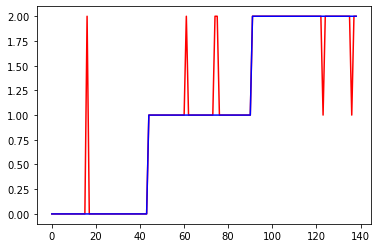

In [33]:
plt.plot(Result_Predict, color = 'red')
plt.plot(Y, color = 'blue')

In [34]:
# samples removed from SepalWidth (External Samples)

dy = New_data.loc[(New_data['SepalWidth'] > 3.9)]
ds = New_data.loc[(New_data['SepalWidth'] < 2.3)]

In [35]:
External_Samples = pd.concat([dy,ds], axis = 0).reset_index(drop=True)
External_Samples

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name_Encoded
0,5.8,4.0,1.2,0.2,0
1,5.7,4.4,1.5,0.4,0
2,5.2,4.1,1.5,0.1,0
3,5.5,4.2,1.4,0.2,0
4,5.0,2.0,3.5,1.0,1
5,6.0,2.2,4.0,1.0,1
6,6.2,2.2,4.5,1.5,1
7,6.0,2.2,5.0,1.5,2


In [36]:
# Normalized_External_Samples = []
# # for a in range(len(dy.index)):
# for i in dy.iloc[0,:-1]:
#         Normalized_External_Samples.append(( i - dy.iloc[0,:4].min(axis=0)) / (dy.iloc[0,:4].max(axis=0) - dy.iloc[0,:4].min(axis=0)))     


from sklearn import preprocessing
External_Sample = preprocessing.normalize(External_Samples.iloc[:,:-1])
External_Sample

array([[0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.76578311, 0.60379053, 0.22089897, 0.0147266 ],
       [0.77867447, 0.59462414, 0.19820805, 0.02831544],
       [0.76923077, 0.30769231, 0.53846154, 0.15384615],
       [0.78892752, 0.28927343, 0.52595168, 0.13148792],
       [0.76444238, 0.27125375, 0.55483721, 0.18494574],
       [0.72712585, 0.26661281, 0.60593821, 0.18178146]])

In [37]:
Prediction = (model.predict(External_Sample)).astype(int)
Prediction

array([0, 0, 0, 0, 1, 1, 1, 2])

In [38]:
Prediction == (External_Samples.iloc[:,-1].values).astype(int)

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [39]:
from sklearn.metrics import mean_absolute_error
Mean_Absolute_Error = mean_absolute_error(Prediction,(External_Samples.iloc[:,-1].values).astype(int))

In [40]:
print(f"Mean Absolute Error: {Mean_Absolute_Error}")

Mean Absolute Error: 0.0


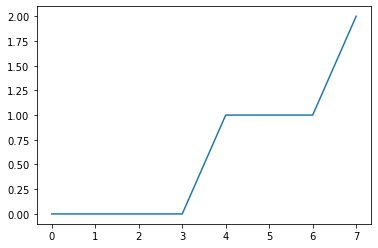

In [41]:
import matplotlib.pyplot as plt
plt.plot(Prediction)

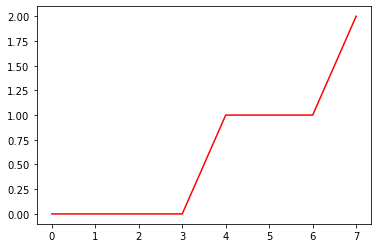

In [43]:
plt.plot(External_Samples.iloc[:,-1].values, color = "red")